In [187]:
import pandas as pd
from matplotlib import pyplot as plt
import json
import math
import re
import numpy as np


# Comandos radon

## Complejidad Ciclomática

In [288]:
%%bash 
WORKDIR=$HOME/Ingenieria/Desarrollo/ATInformatica
# salida cruda a archivo txt 
cd $WORKDIR && radon cc -s -a -e "websas/_dumps/*,websas/admin/*,websas/*/migrations/*,websas/lela/*,websas/*/tests.py,websas/manage.py,websas/websas/*" ./websas/*

websas/orden/forms.py
    C 4:0 OrdenForm - A (1)
    C 25:0 EquipoForm - A (1)
websas/orden/apps.py
    C 4:0 OrdenConfig - A (1)
websas/orden/models.py
    M 151:4 Orden._hacer_en_tareas - A (5)
    M 46:4 Orden.condicion - A (3)
    M 73:4 Orden._tareas_en_estado - A (3)
    M 128:4 Orden.tipos_tarea_agregables - A (3)
    M 192:4 Orden.cancelar - A (3)
    M 57:4 Orden.agregar_tarea - A (2)
    M 143:4 Orden.precio_total - A (2)
    M 186:4 Orden.reservar_stock - A (2)
    M 201:4 Orden.cerrar - A (2)
    M 218:4 Orden.total_repuestos - A (2)
    M 225:4 Orden.total_mano_de_obra - A (2)
    C 12:0 Orden - A (1)
    M 43:4 Orden.__str__ - A (1)
    M 90:4 Orden.tareas_presupuestadas - A (1)
    M 100:4 Orden.tareas_pendientes - A (1)
    M 110:4 Orden.tareas_realizadas - A (1)
    M 119:4 Orden.tareas_canceladas - A (1)
    M 165:4 Orden.aceptar_tareas - A (1)
    M 172:4 Orden.finalizar_tareas - A (1)
    M 179:4 Orden.cancelar_tareas - A (1)
    M 214:4 Orden.tiene_repuestos - A (

websas/reportes/apps.py
    C 4:0 ReportesConfig - A (1)
websas/reportes/views.py
    M 35:4 ReporteTotalOrdenes.ajax_get - B (7)
    M 129:4 ReporteTotalProductos.ajax_get - B (6)
    C 212:0 ReporteEvolucionFacturacionMensual - B (6)
    M 216:4 ReporteEvolucionFacturacionMensual.get - B (6)
    C 18:0 ReporteTotalOrdenes - A (5)
    C 113:0 ReporteTotalProductos - A (4)
    C 74:0 ReporteCantidadOrdenes - A (3)
    M 91:4 ReporteCantidadOrdenes.ajax_get - A (3)
    C 172:0 ReporteCantidadProductos - A (3)
    M 188:4 ReporteCantidadProductos.ajax_get - A (3)
    C 244:0 ReporteCargaTrabajoTecnico - A (3)
    M 251:4 ReporteCargaTrabajoTecnico.get - A (3)
    M 287:4 ReporteTareaMasRealizada.ajax_get - A (3)
    M 319:4 ReporteTecnicoFinalizador.ajax_get - A (3)
    M 29:4 ReporteTotalOrdenes.get - A (2)
    M 85:4 ReporteCantidadOrdenes.get - A (2)
    M 122:4 ReporteTotalProductos.get - A (2)
    M 181:4 ReporteCantidadProductos.get - A (2)
    C 273:0 ReporteTareaMasRealizada - A 

In [172]:
!radon cc -s -e "websas/_dumps/*,websas/admin/*,websas/*/migrations/*,websas/lela/*,websas/*/tests.py,websas/manage.py,websas/websas/*" ./websas/* >> cc.txt

In [263]:
MAX_NODO = 13
nodos = []


# parseo a manople del txt para separar valores 
with open('cc.txt') as f:
    lineas = [l.replace('\n', '').replace('\r', '').strip() for l in f.readlines()]
    for i, l in enumerate(lineas):
        if not l.startswith('websas'):
            _l = l.split(' ')
            block_type = _l[0]
            block_name = _l[2] 
            block_cc_group = _l[4]
            block_cc_score = _l[5].split(')')[0].split('(')[1]
            nodos.append([block_type, block_name, block_cc_group, block_cc_score])

columns = ['tipo', 'nombre', 'cc_goup', 'cc_score']
cc = pd.DataFrame(nodos, columns=columns)

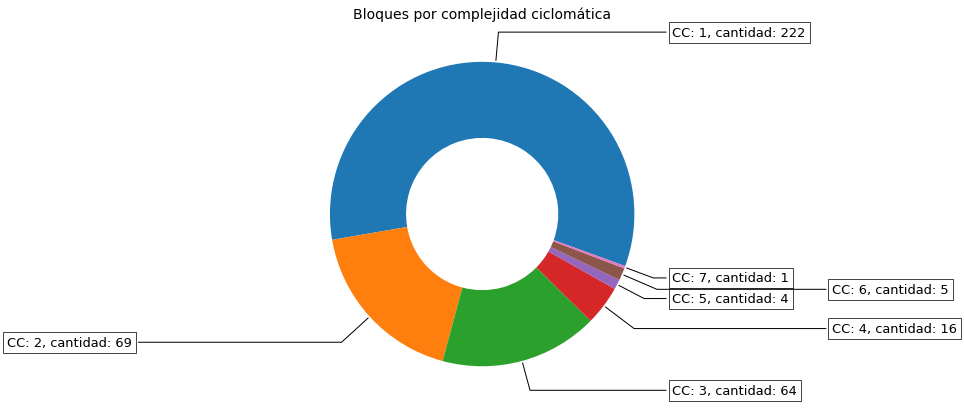

In [279]:
fig, ax = plt.subplots(figsize=(10, 7), subplot_kw=dict(aspect="equal"))

recipe = ["Score 1",
          "90 g sugar",
          "1 egg",
          "60 g butter",
          "100 ml milk",
          "1/2 package of yeast", 
         "otra cosa"]

#data = [225, 90, 50, 60, 100, 5]
data= cc[['nombre', 'cc_score']].groupby('cc_score').count()

wedges, texts = ax.pie(data['nombre'], wedgeprops=dict(width=0.5), startangle=-20)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(xycoords='data', textcoords='data', arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")


for i, p in enumerate(wedges):
#    if i < 5:
    ang = (p.theta2 - p.theta1)/2. + p.theta1

    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))

    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    
    anotation = f"CC: {data.index[i]}, cantidad: {data['nombre'][i]}"
    if i % 2 == 0:
        
        ax.annotate(anotation, xy=(x, y), xytext=(1.25*np.sign(x), 1.2*y),
                 horizontalalignment=horizontalalignment, **kw, fontsize=13)        
    else:
        ax.annotate(anotation, xy=(x, y), xytext=(2.3*np.sign(x), 1.25*y),
                 horizontalalignment=horizontalalignment, **kw, fontsize=13)


ax.set_title("Bloques por complejidad ciclomática", fontsize=14)

plt.savefig('cc.png', bbox_inches="tight", pad_inches=0.5)

In [291]:
cc[cc['cc_goup'] == 'B'] # solo 6 bloques clasificados como B

,tipo,nombre,cc_goup,cc_score
169,M,ReporteTotalOrdenes.ajax_get,B,7
170,M,ReporteTotalProductos.ajax_get,B,6
171,C,ReporteEvolucionFacturacionMensual,B,6
172,M,ReporteEvolucionFacturacionMensual.get,B,6
285,C,TareaCreate,B,6
286,M,TareaCreate.post,B,6


In [306]:
print(f"Clases: { len(cc[cc['tipo'] == 'C']) }")
print(f"Metodos: { len(cc[cc['tipo'] == 'M']) }")
print(f"Funciones: { len(cc[cc['tipo'] == 'F']) }")

Clases: 150
Metodos: 227
Funciones: 4


## Halsted Metrics

In [ ]:
%%bash 
WORKDIR=$HOME/Ingenieria/Desarrollo/ATInformatica
# salida por pantalla
cd $WORKDIR && radon hal -e "websas/*/admin.py,websas/_dumps/*,websas/admin/*,websas/*/migrations/*,websas/*/apps.py,websas/*/__init__.py,websas/lela/*,websas/*/tests.py,websas/manage.py,websas/websas/*" ./websas/*/models.py

In [32]:
%%bash 
WORKDIR=$HOME/Ingenieria/Desarrollo/ATInformatica
# redirige salida cruda a archivo txt, json no sirve por nodos de distinto largo
cd $WORKDIR && radon hal -e "websas/*/admin.py,websas/_dumps/*,websas/admin/*,websas/*/migrations/*,websas/*/apps.py,websas/*/__init__.py,websas/lela/*,websas/*/tests.py,websas/manage.py,websas/websas/*" ./websas/*/models.py >> hm.txt 

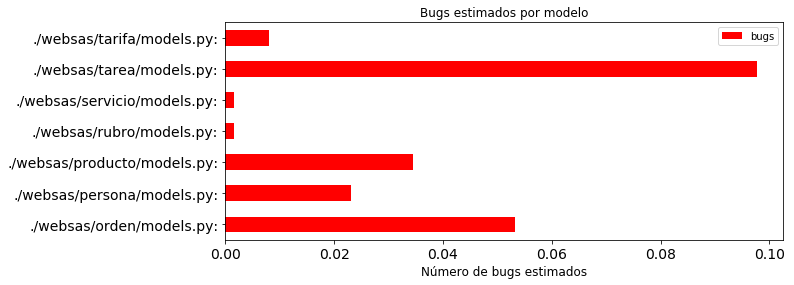

In [336]:
MAX_NODO = 13
nodos = []

#parseo a manopla de txt
with open('hm.txt') as f:
    lineas = [l.replace('\n', '').replace('\r', '').strip() for l in f.readlines()]
    for i, l in enumerate(lineas):
        if l.startswith('./websas'):
            nodos.append(lineas[i:i+MAX_NODO])

columns = ['archivo', 'h1', 'h2', 'N1', 'N2', 'vocabulary', 'length', 'calculated_length', 'volume', 'difficulty', 'effort', 'time', 'bugs']
values = []
for nodo in nodos:
    _v = nodo[1:]
    
    values.append([nodo[0]] + list(map(lambda x: float(x.split(':')[1].strip()), _v)))
    

df = pd.DataFrame(values, columns=columns)
hm = df[df['h1'] != 0]

fig, ax = plt.subplots() 

hm[['bugs', 'archivo']].plot.barh(ax=ax,
    title="Bugs estimados por modelo", 
    fontsize=14,
    color='r'
)

ax.set_yticklabels(hm['archivo'])
_ = ax.set_xlabel('Número de bugs estimados', fontsize=12)

fig.set_figwidth(10)
plt.savefig('bugs.png', bbox_inches="tight", pad_inches=0.5)

In [338]:
hm['time'].sum()/60

2.391778603074038

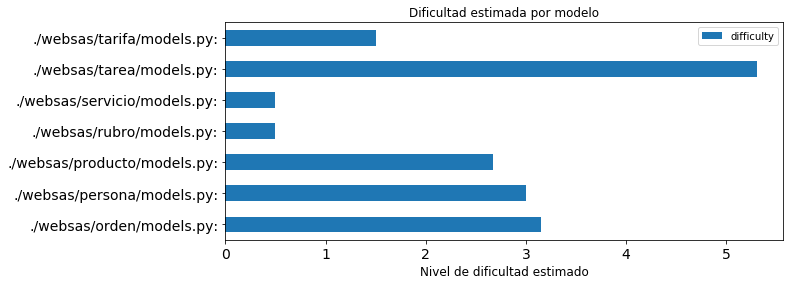

In [131]:
fig, ax = plt.subplots() 

hm[['difficulty', 'archivo']].plot.barh(ax=ax,
    title="Dificultad estimada por modelo", 
    fontsize=14
)

ax.set_yticklabels(hm['archivo'])
_ = ax.set_xlabel('Nivel de dificultad estimado', fontsize=12)

fig.set_figwidth(10)
plt.savefig('difficulty.png', bbox_inches="tight", pad_inches=0.5)

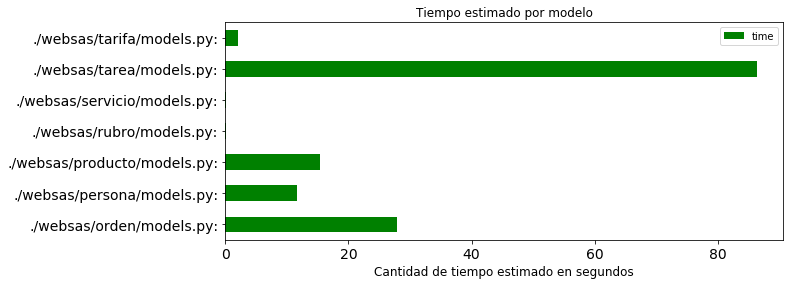

In [149]:
fig, ax = plt.subplots() 

hm[['time', 'archivo']].plot.barh(ax=ax,
    title="Tiempo estimado por modelo", 
    fontsize=14,
    color='g'
)

ax.set_yticklabels(hm['archivo'])
_ = ax.set_xlabel('Cantidad de tiempo estimado en segundos', fontsize=12)

fig.set_figwidth(10)
plt.savefig('time.png', bbox_inches="tight", pad_inches=0.5)

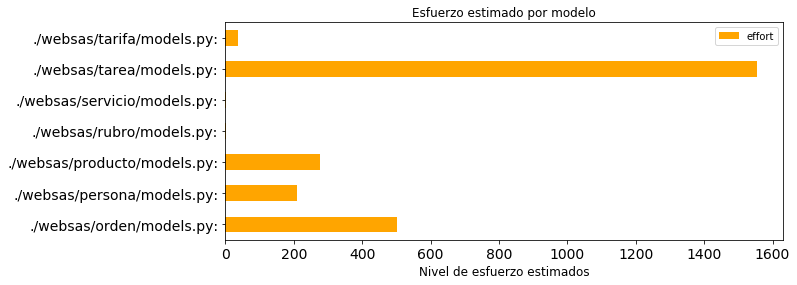

In [333]:
fig, ax = plt.subplots() 

hm[['effort', 'archivo']].plot.barh(ax=ax,
    title="Esfuerzo estimado por modelo", 
    fontsize=14,
    color='orange'
)

ax.set_yticklabels(hm['archivo'])
_ = ax.set_xlabel('Nivel de esfuerzo estimados', fontsize=12)

fig.set_figwidth(10)
plt.savefig('effort.png', bbox_inches="tight", pad_inches=0.5)

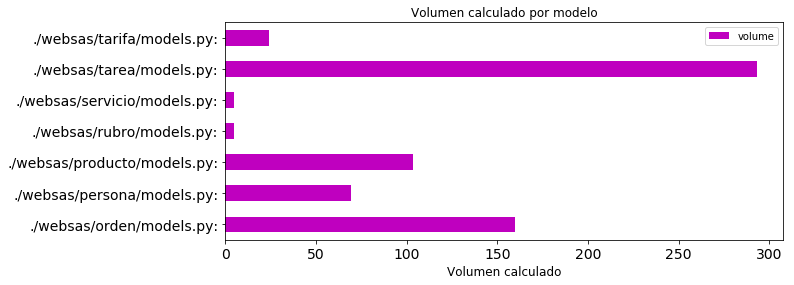

In [332]:
fig, ax = plt.subplots() 

hm[['volume', 'archivo']].plot.barh(ax=ax,
    title="Volumen calculado por modelo", 
    fontsize=14,
    color='m'
)

ax.set_yticklabels(hm['archivo'])
_ = ax.set_xlabel('Volumen calculado', fontsize=12)

fig.set_figwidth(10)
plt.savefig('volume.png', bbox_inches="tight", pad_inches=0.5)

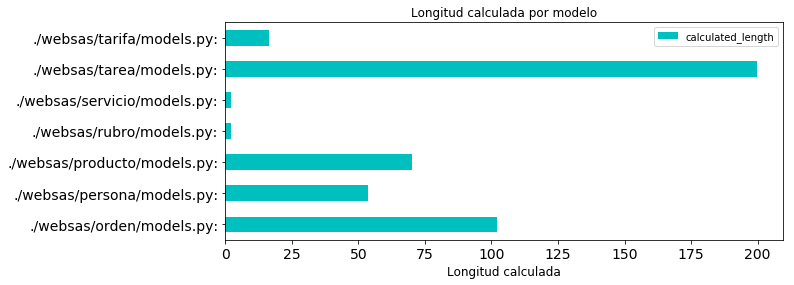

In [335]:
fig, ax = plt.subplots() 

hm[['calculated_length', 'archivo']].plot.barh(ax=ax,
    title="Longitud calculada por modelo", 
    fontsize=14,
    color='c'
)

ax.set_yticklabels(hm['archivo'])
_ = ax.set_xlabel('Longitud calculada', fontsize=12)

fig.set_figwidth(10)
plt.savefig('calc_length.png', bbox_inches="tight", pad_inches=0.5)

## Índice de mantenibilidad

El índice de mantenibilidad es una métrica de software que mide la facilidad de mantenimiento (fácil de admitir y cambiar) del código fuente. El índice de mantenibilidad se calcula como una fórmula factorizada que consta de SLOC (Líneas de código fuente), Complejidad ciclomática y volumen de Halstead. Se utiliza en varias herramientas métricas de software automatizadas, incluido el entorno de desarrollo Microsoft Visual Studio 2010, que utiliza un derivado derivado de escala modificada (0 a 100). Índice de mantenimiento

In [313]:
%%bash 
WORKDIR=$HOME/Ingenieria/Desarrollo/ATInformatica
# esta genera el json y redirige salida al archivo
cd $WORKDIR && radon mi -m -s -e "websas/*/admin.py,websas/_dumps/*,websas/admin/*,websas/*/migrations/*,websas/*/apps.py,websas/*/__init__.py,websas/lela/*,websas/*/tests.py,websas/manage.py,websas/websas/*" ./websas 

websas/reportes/forms.py - A (100.00)
websas/reportes/models.py - A (100.00)
websas/reportes/views.py - A (38.37)
websas/reportes/urls.py - A (100.00)
websas/tarifa/forms.py - A (73.32)
websas/tarifa/models.py - A (79.01)
websas/tarifa/views.py - A (100.00)
websas/tarifa/urls.py - A (100.00)
websas/tarea/forms.py - A (52.55)
websas/tarea/models.py - A (37.05)
websas/tarea/views.py - A (45.08)
websas/tarea/urls.py - A (100.00)
websas/producto/forms.py - A (64.88)
websas/producto/models.py - A (59.46)
websas/producto/views.py - A (100.00)
websas/producto/urls.py - A (100.00)
websas/persona/forms.py - A (51.14)
websas/persona/models.py - A (42.89)
websas/persona/urls/cliente.py - A (100.00)
websas/persona/urls/empleado.py - A (100.00)
websas/persona/views/cliente.py - A (65.13)
websas/persona/views/empleado.py - A (52.58)
websas/orden/forms.py - A (100.00)
websas/orden/models.py - A (41.56)
websas/orden/views.py - A (49.04)
websas/orden/urls.py - A (100.00)
websas/sas/models.py - A (100.0

In [4]:
%%bash 
WORKDIR=$HOME/Ingenieria/Desarrollo/ATInformatica
# esta genera el json y redirige salida al archivo
cd $WORKDIR && radon mi --json -m -s -e "websas/*/admin.py,websas/_dumps/*,websas/admin/*,websas/*/migrations/*,websas/*/apps.py,websas/*/__init__.py,websas/lela/*,websas/*/tests.py,websas/manage.py,websas/websas/*" ./websas >>  mi.json

# esta es para salida por pantalla
# cd $WORKDIR && radon mi -m -s -e "websas/*/admin.py,websas/_dumps/*,websas/admin/*,websas/*/migrations/*,websas/*/apps.py,websas/*/__init__.py,websas/lela/*,websas/*/tests.py,websas/manage.py,websas/websas/*" ./websas

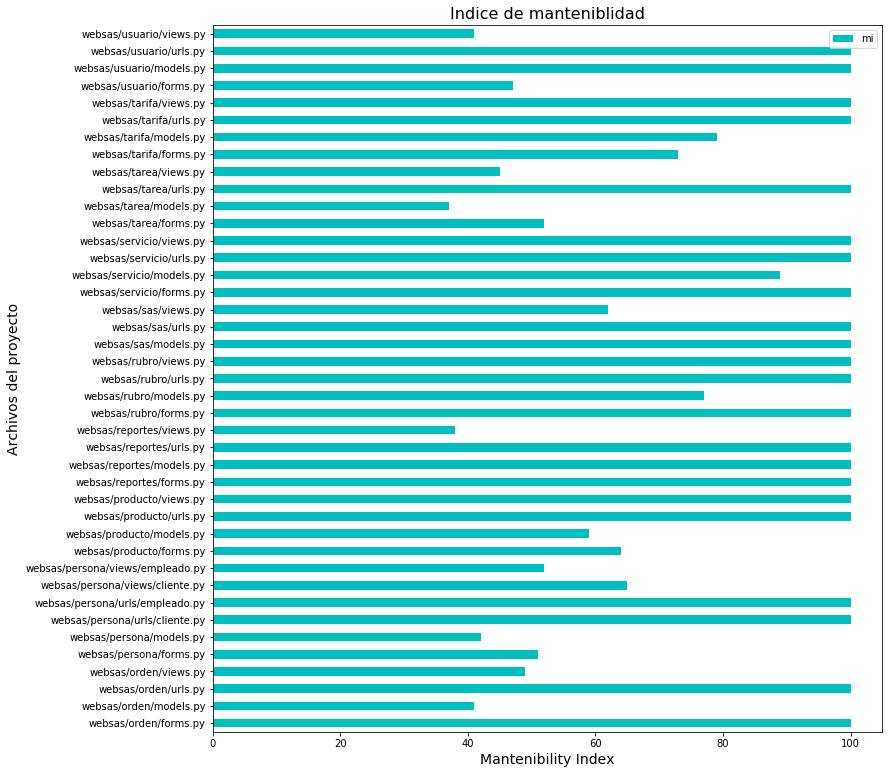

In [317]:
mi = pd.read_json('mi.json', orient='index')
mi['file'] = mi.index
mi['mi'] = list(map(lambda x: math.trunc(x), mi['mi']))

fig, ax = plt.subplots() 

mi[['mi', 'file']].plot.barh(ax=ax,figsize=[12, 13], color='c')
    
ax.set_xlabel('Mantenibility Index', fontsize=14)
ax.set_ylabel('Archivos del proyecto', fontsize=14)
ax.set_title('Indice de manteniblidad', fontsize=16)
plt.savefig('imantenibilidad.png', bbox_inches="tight", pad_inches=0.5)

In [330]:
print(len(mi))
print(len(mi[mi['mi'] < 40]))
print(len(mi[mi['mi'] >= 60]))


41
2
29


In [314]:
print(len(mi[mi['mi'] == 100]))

22


In [323]:
np.average(mi['mi'])

79.58536585365853

## Raw Metrics

Las siguientes son las definiciones empleadas por el radón:

     
  + LOC: El número total de líneas de código. No corresponde necesariamente al número de líneas en el archivo.
   
  + LLOC: El número de líneas lógicas de código. Cada línea lógica de código contiene exactamente una declaración.
   
  + SLOC: El número de líneas de código fuente, que no necesariamente se corresponden con el LLOC.
  
  + Comentarios: El número de líneas de comentario. Las cadenas de varias líneas no se cuentan como comentarios, ya que, para el intérprete de Python, son solo cadenas.
  
  + Multi: El número de líneas que representan cadenas multilínea.
  
  + Espacios en blanco: el número de líneas en blanco (o en espacios en blanco solamente).

In [16]:
%%bash 
# opción -s para mostrar totales al final que es lo que usamos para el docu
WORKDIR=$HOME/Ingenieria/Desarrollo/ATInformatica
cd $WORKDIR && radon raw -s -e "websas/*/admin.py,websas/_dumps/*,websas/admin/*,websas/*/migrations/*,websas/*/apps.py,websas/*/__init__.py,websas/lela/*,websas/*/tests.py,websas/manage.py,websas/websas/*" ./websas

websas/reportes/forms.py
    LOC: 91
    LLOC: 44
    SLOC: 75
    Comments: 0
    Single comments: 0
    Multi: 0
    Blank: 16
    - Comment Stats
        (C % L): 0%
        (C % S): 0%
        (C + M % L): 0%
websas/reportes/models.py
    LOC: 3
    LLOC: 1
    SLOC: 1
    Comments: 1
    Single comments: 1
    Multi: 0
    Blank: 1
    - Comment Stats
        (C % L): 33%
        (C % S): 100%
        (C + M % L): 33%
websas/reportes/views.py
    LOC: 334
    LLOC: 183
    SLOC: 248
    Comments: 5
    Single comments: 5
    Multi: 0
    Blank: 81
    - Comment Stats
        (C % L): 1%
        (C % S): 2%
        (C + M % L): 1%
websas/reportes/urls.py
    LOC: 18
    LLOC: 4
    SLOC: 16
    Comments: 3
    Single comments: 0
    Multi: 0
    Blank: 2
    - Comment Stats
        (C % L): 17%
        (C % S): 19%
        (C + M % L): 17%
websas/tarifa/forms.py
    LOC: 21
    LLOC: 13
    SLOC: 15
    Comments: 0
    Single comments: 0
    Multi: 0
    Blank: 6
    - Comment Stat

In [ ]:
!pip install pylint

In [ ]:
! pyreverse -a1 -s1 -f ALL -o png -p websas --ignore=websas/lela -A -my websas/*

In [ ]:
! pyreverse -h

In [ ]:
%%bash 
echo $(find ./websas/lela -name *.py)

In [ ]:
!find -help

In [287]:
%%bash 
WORKDIR=$HOME/Ingenieria/Desarrollo/ATInformatica
cd $WORKDIR && ls

bugs.png
cc.png
cc.txt
classes_websas.png
difficulty.png
doc
docker-compose.yml
Dockerfile
effort.png
GUION_PRESENTACION.txt
hm.json
hm.txt
imantenibilidad.png
mi.json
packages_websas.png
ReadMe.md
requirements.txt
time.png
Untitled.ipynb
websas
